In the following notebook, we will see how to use Albumentations library for image augmentation. This notebook serves as a playground for the library. We will see how to use the library for image augmentation and how the augmented images look like.

You can check a more completed playground in the following page: https://demo.albumentations.ai/

### Import Libraries

In [1]:
# append the path of the parent directory
import sys
sys.path.append("..")

In [2]:
from etl.dataset import CustomFashionMNISTDataModule, LABEL_TO_CLASS

In [3]:
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

## Data Loading

In [4]:
# Define data transformations
transform = A.Compose([
    ToTensorV2()
])

In [5]:
dm = CustomFashionMNISTDataModule(transform, transform, normalization="none")
dm.setup()
imgs, labels = next(iter(dm.train_dataloader()))
imgs.shape, labels.shape

(torch.Size([64, 1, 1, 28, 28]), torch.Size([64]))

In [6]:
print(f"Max imgs value: {imgs.max()}")
print(f"Min imgs value: {imgs.min()}")

Max imgs value: 255.0
Min imgs value: 0.0


----

## Data Augmentations

### Original Image

In [7]:
single_clase = imgs[0, 0, ...].data.cpu().numpy()

(-0.5, 27.5, 27.5, -0.5)

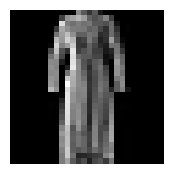

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(single_clase, cmap="gray")
plt.axis("off")

### Horizontal Flip

In [9]:
my_augmentation = A.Compose([
    A.HorizontalFlip(p=1)
])
augmented = my_augmentation(image=single_clase)["image"]

(-0.5, 27.5, 27.5, -0.5)

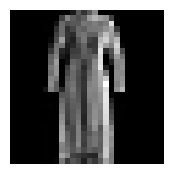

In [10]:
plt.figure(figsize=(2,2))
plt.imshow(augmented, cmap="gray")
plt.axis("off")

### Vertical Flip

In [11]:
my_augmentation = A.Compose([
    A.VerticalFlip(p=1)
])
augmented = my_augmentation(image=single_clase)["image"]

(-0.5, 27.5, 27.5, -0.5)

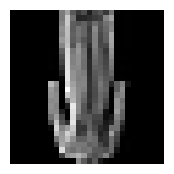

In [12]:
plt.figure(figsize=(2,2))
plt.imshow(augmented, cmap="gray")
plt.axis("off")

### Rotate

In [13]:
my_augmentation = A.Compose([
    A.Rotate(
        p=1.0, limit=(-75, 75),
        interpolation=0, border_mode=0, value=(0, 0, 0),
        mask_value=None, crop_border=False
    )
])
augmented = my_augmentation(image=single_clase)["image"]

(-0.5, 27.5, 27.5, -0.5)

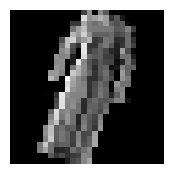

In [14]:
plt.figure(figsize=(2,2))
plt.imshow(augmented, cmap="gray")
plt.axis("off")

### Posterize

In [15]:
my_augmentation = A.Compose([
    A.Posterize(
        p=1.0, num_bits=[2, 5]
    )
])
augmented = my_augmentation(image=single_clase)["image"]

(-0.5, 27.5, 27.5, -0.5)

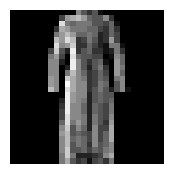

In [16]:
plt.figure(figsize=(2,2))
plt.imshow(augmented, cmap="gray")
plt.axis("off")

### Contrast

In [17]:
my_augmentation = A.Compose([
    A.RandomBrightnessContrast(p=1.0, brightness_limit=(0), contrast_limit=(-0.5, 0.5))
])
augmented = my_augmentation(image=single_clase)["image"]

(-0.5, 27.5, 27.5, -0.5)

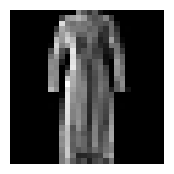

In [18]:
plt.figure(figsize=(2,2))
plt.imshow(augmented, cmap="gray")
plt.axis("off")

### Brightness

In [19]:
my_augmentation = A.Compose([
    A.RandomBrightnessContrast(p=1.0, brightness_limit=(-0.5, 0.5), contrast_limit=(0), brightness_by_max=True)
])
augmented = my_augmentation(image=single_clase)["image"]

(-0.5, 27.5, 27.5, -0.5)

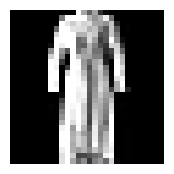

In [20]:
plt.figure(figsize=(2,2))
plt.imshow(augmented, cmap="gray")
plt.axis("off")

### Blur

In [21]:
my_augmentation = A.Compose([
    A.AdvancedBlur(
        p=1.0,
        blur_limit=(3, 7),
        sigmaX_limit=(0.2, 1.0),
        sigmaY_limit=(0.2, 1.0),
        rotate_limit=(-90, 90),
        beta_limit=(0.5, 8.0),
        noise_limit=(0.9, 1.1)
    )
])
augmented = my_augmentation(image=single_clase)["image"]

(-0.5, 27.5, 27.5, -0.5)

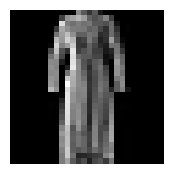

In [22]:
plt.figure(figsize=(2,2))
plt.imshow(augmented, cmap="gray")
plt.axis("off")

### Dropout

In [23]:
my_augmentation = A.Compose([
    A.CoarseDropout(
        p=1.0,
        min_holes=3,
        max_holes=6,
        min_height=4,
        max_height=6,
        min_width=4,
        max_width=6,
        fill_value=0
    )
])
augmented = my_augmentation(image=single_clase)["image"]

(-0.5, 27.5, 27.5, -0.5)

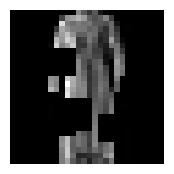

In [24]:
plt.figure(figsize=(2,2))
plt.imshow(augmented, cmap="gray")
plt.axis("off")

### Random Crop

In [25]:
my_augmentation = A.Compose([
    A.RandomResizedCrop(
        p=1.0,
        height=28,
        width=28,
        scale=(0.75, 1.0),
        ratio=(0.75, 1.3333333333333333),
        interpolation=0
    )
])
augmented = my_augmentation(image=single_clase)["image"]

(-0.5, 27.5, 27.5, -0.5)

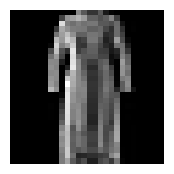

In [26]:
plt.figure(figsize=(2,2))
plt.imshow(augmented, cmap="gray")
plt.axis("off")

### Shift & Scale & Rotate

In [70]:
my_augmentation = A.Compose([
    A.ShiftScaleRotate(
        p=1.0,
        shift_limit_x=(-0.25, 0.25),
        shift_limit_y=(-0.25, 0.25),
        scale_limit=0,
        rotate_limit=0,
        interpolation=0, border_mode=0, value=0, mask_value=None
    )
])
augmented = my_augmentation(image=single_clase)["image"]

(-0.5, 27.5, 27.5, -0.5)

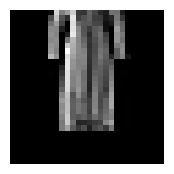

In [71]:
plt.figure(figsize=(2,2))
plt.imshow(augmented, cmap="gray")
plt.axis("off")